# 목차
[1. 데이터 추출 및 전처리](#1.데이터-추출-및-전처리)  
-[데이터 추출](#데이터-추출)    
-[전처리](#전처리)  
[2. 데이터 시각화](#2.데이터-시각화)     
-[상관계수 시각화](#상관계수)  
-[Group by 배급사](#배급사별-집계-시각화)  
-[Group by Month](#월별-집계-시각화)  
-[Group by 시청등급](#시청등급별-집계-시각화)  

# 1.데이터 추출 및 전처리

## 데이터 추출

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data_path = '20180101-20181230_박스오피스'

base_dir = os.path.join(data_path)

In [3]:
data = os.listdir(base_dir)

data_csv = ['./20180101-20181230_박스오피스/'+i for i in data if 'csv' in i]
data_csv
# 데이터 폴더 안의 모든 csv 데이터를 불러온다.

['./20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-01-07.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-01-14.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-01-21.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-01-28.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-02-04.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-02-11.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-02-18.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-02-25.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-03-04.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-03-11.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-03-18.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-03-25.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-04-01.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-04-08.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-04-15.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오피스_2018-04-22.csv',
 './20180101-20181230_박스오피스/KOBIS_일별_박스오

## 전처리

In [4]:
def pre(data):  # 전처리(column 명 재설정)
    df1 = pd.read_csv(data, thousands=',')
    
    df1_new = df1

    header = df1.iloc[5]  # data가 header 가 제대로 들어가있지 않기 때문에 header를 지정해준다.
    header

    df1_add_head = np.array(df1.iloc[6].fillna(''))

    new_header = header + df1_add_head
    df1_new.columns = new_header

    index = np.array(df1_new['순위'])
    
    header = []
    head_idx = []
    tail_idx = []

    # 데이터에서 필요 없는 행(공란)을 삭제
    for idx, no in enumerate(index):  
        if str(no).startswith("●20"):
            header.append(no)
        if no == '1':
            head_idx.append(idx)
        if no == '합계':
            tail_idx.append(idx-1)
        
    header_idx = [[i for i in range(head_idx[h], tail_idx[h]+1)] for h in range(len(head_idx))]
    
    non_drop = [i for h in range(len(head_idx)) for i in range(head_idx[h], tail_idx[h]+1) ]

    df1_new_list = np.array(df1_new)
    tytle_list = []
    drop_list = []


    for idx,row in enumerate(df1_new_list):
        for ind,lis in enumerate(header_idx):
            if idx in lis:
                tytle_list.append(header[ind])
            
    for idx,row in enumerate(df1_new_list):
        if idx not in non_drop:
            drop_list.append(idx)
            
    df1_new = df1_new.drop(drop_list, axis=0) 
    df1_new.index = tytle_list
    
    return df1_new

In [5]:
datas = []

for i in data_csv:
    datas.append(pre(i))

In [6]:
df = pd.concat(datas)
df.to_csv('pre_data.csv')
# 모든 csv를 간단한 전처리 후 통합해서 데이터 프레임으로 만들고 저장.

In [7]:
# 수치형 변수들이 문자형으로 돼있어 수치형으로 변환

df['매출액 '] = df['매출액 '].str.replace(',','').astype('int64')
df['매출액점유율 '] = df['매출액점유율 '].str.replace('%','').astype('float')
df['매출액증감(전일대비) '] = df['매출액증감(전일대비) '].str.replace(',','').astype('int64')
df['매출액증감율(전일대비) '] = df['매출액증감율(전일대비) '].str.replace('%','').astype('float')
df['누적매출액 '] = df['누적매출액 '].str.replace(',','').astype('int64')
df['관객수 '] = df['관객수 '].str.replace(',','').astype('int64')
df['관객수증감(전일대비) '] = df['관객수증감(전일대비) '].str.replace(',','').astype('int64')
df['관객수증감율(전일대비) '] = df['관객수증감율(전일대비) '].str.replace('%','').astype('float')
df['누적관객수 '] = df['누적관객수 '].str.replace(',','').astype('int64')
df['스크린수 '] = df['스크린수 '].str.replace(',','').astype('int64')
df['상영횟수 '] = df['상영횟수 '].str.replace(',','').astype('int64')

In [8]:
df = df.dropna(subset=['장르 '])
gen_list = np.array(df['장르 '])
rep_gen = []
for i in gen_list:
    li = str(i).split(',')
    rep_gen.append(li[0])
    
df['new장르'] = rep_gen
df

5,순위,영화명,개봉일,매출액,매출액점유율,매출액증감(전일대비),매출액증감율(전일대비),누적매출액,관객수,관객수증감(전일대비),...,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,new장르
●2018년 01월 07일(일),1,신과함께-죄와 벌,2017-12-20,4191233200,35.9,-414038062,-9.0,92571580337,502236,-46101,...,5464,한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",판타지
●2018년 01월 07일(일),2,1987,2017-12-27,3539227900,30.3,-132997398,-3.6,32847722932,421153,-15602,...,4738,한국,한국,(주)우정필름,씨제이이앤엠(주),15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가...",드라마
●2018년 01월 07일(일),3,쥬만지: 새로운 세계,2018-01-03,2144205100,18.4,-127156870,-5.6,7342405650,255402,-13363,...,3162,미국,미국,NaN,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,12세이상관람가,"액션,어드벤처",제이크 캐스단,"드웨인 존슨,잭 블랙,케빈 하트,카렌 길런,매디슨 아이스먼",액션
●2018년 01월 07일(일),4,페르디난드,2018-01-03,758165400,6.5,-6955400,-0.9,2625604300,98378,-1827,...,1549,미국,미국,NaN,이십세기폭스코리아(주),전체관람가,"애니메이션,어드벤처,코미디",카를로스 살다나,"존 시나,케이트 맥키넌,데이비드 테넌트,바비 카나베일,미구엘 앙겔 실베스트르,지나 ...",애니메이션
●2018년 01월 07일(일),5,강철비,2017-12-14,359118000,3.1,-51566600,-12.6,34705414466,43259,-5999,...,914,한국,한국,"(주)와이웍스엔터테인먼트,(주)모팩",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,드라마",양우석,"정우성,곽도원,김갑수,김의성,이경영,조우진,정원중,김명곤,박은혜,김지호,안미나,원진...",액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
●2018년 12월 24일(월),101,열녀문,NaN,2000,0.0,2000,100.0,8936000,1,1,...,1,한국,한국,신필름,NaN,청소년관람불가,사극,신상옥,"신영균,최은희",사극
●2018년 12월 24일(월),101,뷰티풀 데이즈,2018-11-21,7000,0.0,-30000,-81.1,54437050,1,-8,...,1,한국,"한국,프랑스",(주)페퍼민트앤컴퍼니,"(주)콘텐츠판다,(주)스마일이엔티",12세이상관람가,드라마,윤재호,"이나영,장동윤,오광록,서현우,고영상,김아라,김현주,이강우,이기훈,이정은,전성모,정준...",드라마
●2018년 12월 24일(월),101,위시업,2018-12-13,2000,0.0,2000,100.0,14598550,1,1,...,1,미국,미국,NaN,(주)영화사 그램,15세이상관람가,"뮤지컬,코미디,멜로/로맨스",스콧 스피어,"로스 린치,올리비아 홀트",뮤지컬
●2018년 12월 24일(월),101,리스펙트,2018-11-28,6000,0.0,0,0.0,18968250,1,0,...,1,한국,한국,라이브(주),커넥트픽쳐스(주),15세이상관람가,다큐멘터리,심재희,"더 콰이엇,도끼,딥플로우,MC 메타,빈지노,산이,스윙스,제리케이,제이제이케이,타이거...",다큐멘터리


# 2.데이터 시각화

## 상관계수

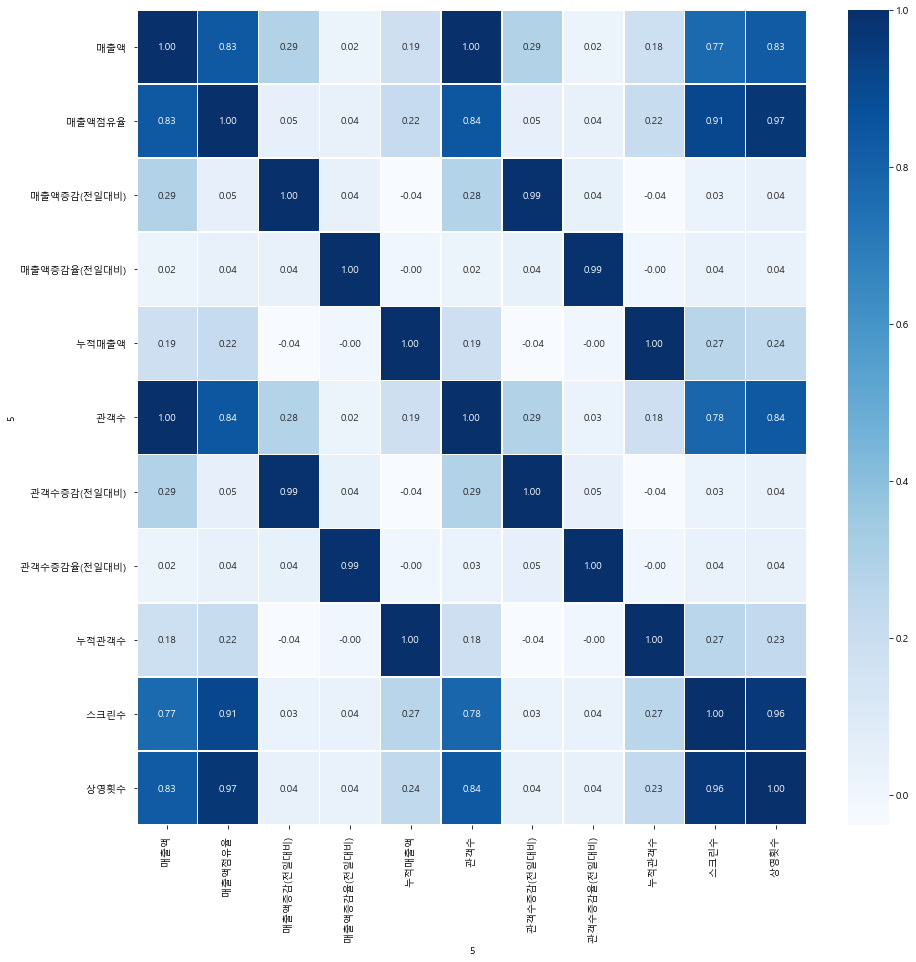

In [9]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

#### 각 변수들의 상관계수를 분석한 결과 스크린수와 관객수, 매출액 등은 강한 양의 상관관계를 가짐을 알 수 있다

#### 그렇다면 스크린 점유에 비해 많은 관객(CPS customer per screen 라 칭하겠다)을 유치한 배급사는 어디인지 시각화 해보자.

In [10]:
# 영화 배급사 별 관객수를 추출하기 위한 작업

bae_au = df['관객수 '].groupby(df['배급사 ']).sum()
bae_au

배급사 
(사)필레마,필름포럼,홀리가든               10
(유)영화사 화수분                    555
(유)영화사 화수분,(주)아펙스 엔터테인먼트        0
(유)영화사 화수분,(주)에스비에스콘텐츠허브        0
(유)조이앤시네마                    1010
                            ...  
하준사                          1424
하준사,씨제이엔터테인먼트                 103
한국소니픽쳐스릴리징브에나비스타영화㈜          2198
한국영상투자개발(주),(주)싸이더스             0
힘컨텐츠(주),(주)디스테이션            60561
Name: 관객수 , Length: 478, dtype: int64

In [11]:
bae_au = np.array(bae_au)
bae_sc = df['스크린수 '].groupby(df['배급사 ']).sum()
bae_sc = np.array(bae_sc)
bae = list(set(np.array(df['배급사 '].dropna(), dtype='str')))
bae.sort()

In [12]:
bae_dic = {i:0 for i in bae}

for i in range(len(bae_au)):
    bae_dic[bae[i]] = bae_au[i]
    
sort_bae = sorted(bae_dic.items(), reverse=True, key=lambda item:item[1])
sort_bae_top = sort_bae[:10]
sort_bae_top

x2 = []
y2 = []

for i,j in sort_bae_top:
    x2.append(i)
    y2.append(j)

In [13]:
bae_dic2 = {i:0 for i in bae}

for i in range(len(bae_sc)):
    bae_dic2[bae[i]] = bae_sc[i]

sort_bae_sc = sorted(bae_dic2.items(), reverse=True, key=lambda item:item[1])
sort_bae_sc_top = sort_bae_sc[:10]

x = []
y = []

for i,j in sort_bae_sc_top:
    x.append(i)
    y.append(j)
    
    
print(x2)
print(y2)
print(x)
print(y)

['월트디즈니컴퍼니코리아 유한책임회사', '씨제이이앤엠(주)', '롯데컬처웍스(주)롯데엔터테인먼트', '(주)넥스트엔터테인먼트월드(NEW)', '워너브러더스 코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)', '(주)쇼박스', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '롯데쇼핑㈜롯데엔터테인먼트', '월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)']
[30157542, 28592027, 26172716, 20815469, 18801309, 12455350, 12294023, 11253828, 10339859, 9706568]
['씨제이이앤엠(주)', '월트디즈니컴퍼니코리아 유한책임회사', '(주)넥스트엔터테인먼트월드(NEW)', '워너브러더스 코리아(주)', '롯데컬처웍스(주)롯데엔터테인먼트', '유니버설픽쳐스인터내셔널 코리아(유)', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '메가박스중앙(주)플러스엠', '(주)쇼박스', '롯데쇼핑㈜롯데엔터테인먼트']
[217827, 189519, 183352, 167028, 136270, 123333, 99113, 94318, 92550, 92392]


## 배급사별 집계 시각화

In [14]:
sc_au = []
bae_sc_au = []

for i,j in sort_bae_sc:
    for k,l in sort_bae:
        if i == k:
            bae_sc_au.append(i)
            sc_au.append(l/j)
      
sc_au_fin = []
for i in range(len(sc_au)):
    sc_au_fin.append([bae_sc_au[i], sc_au[i]])
    
sc_au_fin.sort(key=lambda x:x[1], reverse=True)
sc_au_fin_top = sc_au_fin[:10]

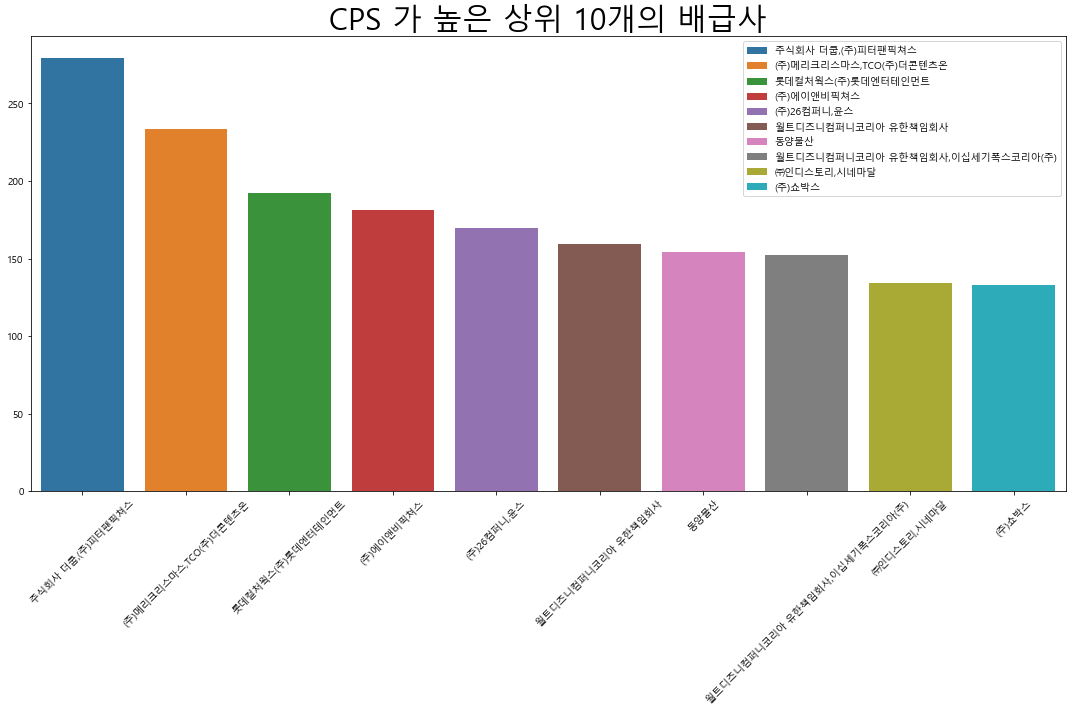

In [15]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
sns.barplot(x=[i[0] for i in sc_au_fin_top], y=[i[1] for i in sc_au_fin_top], hue=[i[0] for i in sc_au_fin_top], dodge=False)
plt.title('CPS 가 높은 상위 10개의 배급사', fontsize=30)
plt.xticks(rotation=45)
ax.set_alpha(0.5)

fig.tight_layout()
plt.show()

In [16]:
def bae_cps(bae):
    sr = df[df['배급사 '] == bae].groupby(['new장르'])['영화명'].count()
    sr_df = pd.DataFrame({'배급사':[], 'count':[]})
    sr_df['count'] = sr
    sr_df['배급사'] = bae
    
    return sr_df

In [17]:
sr_list = []
cps_top = [i[0] for i in sc_au_fin_top]
for bae in cps_top:
    sr_list.append(bae_cps(bae))
    
df_cps = pd.concat(sr_list)
df_cps = df_cps.reset_index()
df_cps

,new장르,배급사,count
0,드라마,"주식회사 더쿱,(주)피터팬픽쳐스",10
1,판타지,"(주)메리크리스마스,TCO(주)더콘텐츠온",16
2,다큐멘터리,롯데컬처웍스(주)롯데엔터테인먼트,2
3,드라마,롯데컬처웍스(주)롯데엔터테인먼트,178
4,멜로/로맨스,롯데컬처웍스(주)롯데엔터테인먼트,34
5,액션,롯데컬처웍스(주)롯데엔터테인먼트,90
6,코미디,롯데컬처웍스(주)롯데엔터테인먼트,21
7,판타지,롯데컬처웍스(주)롯데엔터테인먼트,105
8,드라마,(주)에이앤비픽쳐스,4
9,다큐멘터리,"(주)26컴퍼니,윤스",1


In [18]:
sr_list2 = []
cps = [i[0] for i in sc_au_fin]
for bae in cps:
    sr_list2.append(bae_cps(bae))
    
df_cps2 = pd.concat(sr_list2)
df_cps2 = df_cps2.reset_index()
df_cps2

,new장르,배급사,count
0,드라마,"주식회사 더쿱,(주)피터팬픽쳐스",10
1,판타지,"(주)메리크리스마스,TCO(주)더콘텐츠온",16
2,다큐멘터리,롯데컬처웍스(주)롯데엔터테인먼트,2
3,드라마,롯데컬처웍스(주)롯데엔터테인먼트,178
4,멜로/로맨스,롯데컬처웍스(주)롯데엔터테인먼트,34
...,...,...,...
961,드라마,(주)미디어데이,1
962,드라마,"(주)블룸즈베리리소시스리미티드,(주)프라임엔터테인먼트",1
963,드라마,"(주)키다리이엔티,주식회사 키위컴퍼니",1
964,액션,(주)토러스엔터테인먼트,1


In [19]:
genre = np.array(df['장르 '])

genre_dic = {}
row_list = []
for row in genre:
    add_row = ''
    add_row = str(row).split(',')
    for i in add_row:
        row_list.append(i)

row_set = set(row_list)

genre_dic = {i:[] for i in row_set}
genre_dic

lines = np.array(df)

for row in lines:
    genre_list = str(row[-4]).split(',')
    for i in genre_list:
        genre_dic[i].append(row[2])

genre_num = {i:0 for i in row_set}
for i in genre_dic:
    genre_num[i] = len(genre_dic[i])
print(genre_num)

{'뮤지컬': 819, '코미디': 5118, '다큐멘터리': 3889, '공포(호러)': 1465, '가족': 1426, '서부극(웨스턴)': 316, '스릴러': 3789, '판타지': 2411, '액션': 5437, '공연': 307, 'SF': 1808, '사극': 562, '어드벤처': 3280, '멜로/로맨스': 6202, '애니메이션': 5179, '미스터리': 1548, '드라마': 18956, '범죄': 2215, '전쟁': 1103, '성인물(에로)': 236, '기타': 1047}


No handles with labels found to put in legend.


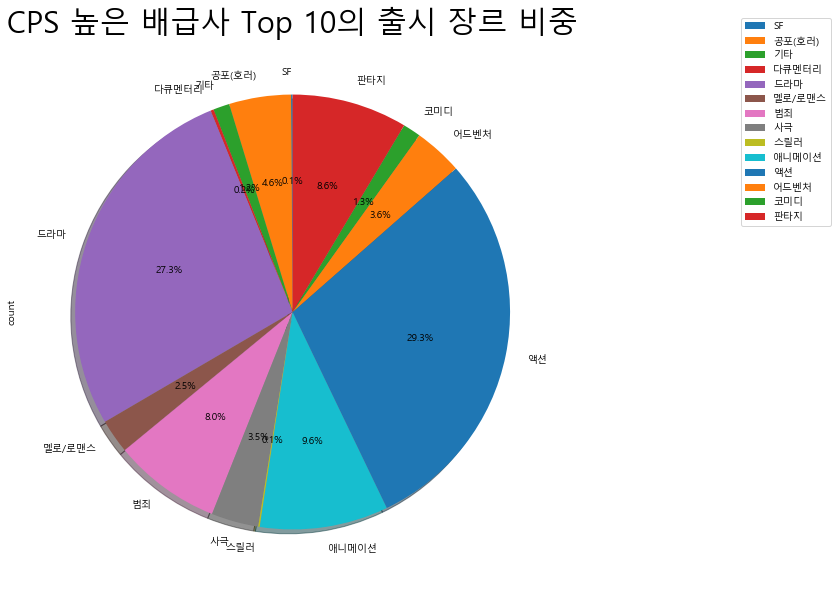

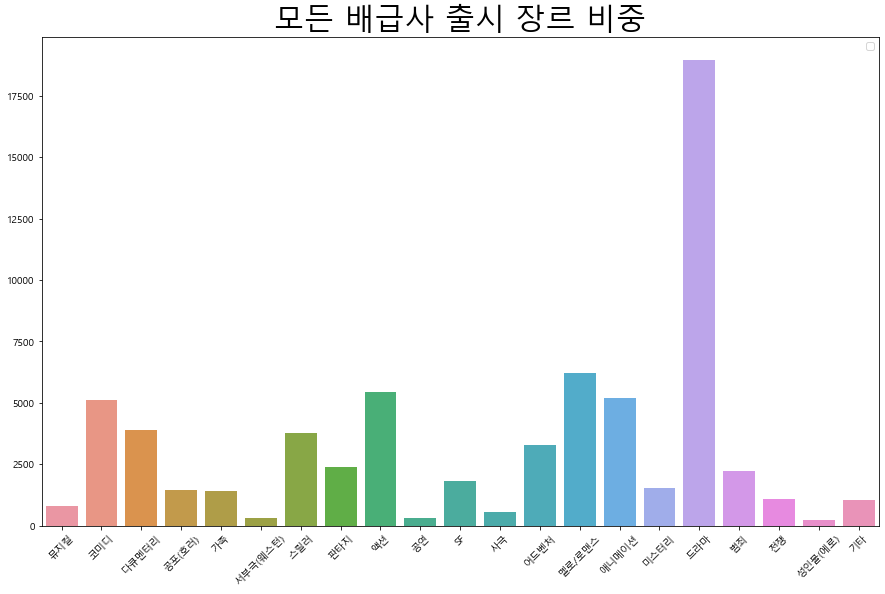

In [20]:
df_cps.groupby(['new장르']).sum().plot(figsize=(15,10), kind='pie', y='count', shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('CPS 높은 배급사 Top 10의 출시 장르 비중', fontsize=30)
plt.legend(bbox_to_anchor=(1.5, 1.05))
ax.set_alpha(0.5)

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
sns.barplot(x=list(genre_num.keys()), y=list(genre_num.values()))
ax.set_xticklabels(list(genre_num.keys()), rotation=45)
ax.legend(loc='upper right')
plt.title('모든 배급사 출시 장르 비중', fontsize=30)
ax.set_alpha(0.5)
plt.show()

#### 위의 결과로 보아 CPS가 높은 배급사는 타 배급사 보다 <액션 >장르의 영화를 많이 배급하였다.

## 월별 집계 시각화

In [21]:
df = df.reset_index()

In [22]:
lines = np.array(df)
lines

array([['●2018년 01월 07일(일)', '1', '신과함께-죄와 벌', ..., '김용화',
        '하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안,이정재,김해숙,이경영,김하늘,최용훈,강소백,정수윤,이수봉,이승준,이지향,김태준,정지훈,예수정,김기태,성유빈,오희준,이준혁,유수빈,윤지온,임철수,나철,강길우,김민종,홍인,정순원,김그림,박윤호,양지수,김지나',
        '판타지'],
       ['●2018년 01월 07일(일)', '2', '1987', ..., '장준환',
        '김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가영,이동욱,이동희,이상준,이태형,최광일,강동원,문소리,문성근,김원진,남민우,이주영,임병우,김시은,김기태,정재윤,황성준,서현우,조민준,박지환,박명신,김푸름,이화룡,이창훈,이신성,김수진,박경혜,김국희,황정민,한준우,정승길,현봉식,강신철,한성천,나철,김승훈,정인기,양조아,최교식,이장유,김경덕,최현종,정순원,이하영,유정호,곽진석,박혁민,염석무',
        '드라마'],
       ['●2018년 01월 07일(일)', '3', '쥬만지: 새로운 세계', ..., '제이크 캐스단',
        '드웨인 존슨,잭 블랙,케빈 하트,카렌 길런,매디슨 아이스먼', '액션'],
       ...,
       ['●2018년 12월 24일(월)', '101', '위시업', ..., '스콧 스피어',
        '로스 린치,올리비아 홀트', '뮤지컬'],
       ['●2018년 12월 24일(월)', '101', '리스펙트', ..., '심재희',
        '더 콰이엇,도끼,딥플로우,MC 메타,빈지노,산이,스윙스,제리케이,제이제이케이,타이거 JK,팔로알토,허클베리피,김봉현,김봉현,산이',
        '다큐멘터리'],
       ['●2018년 12월 24일(월)', '105', '우리들', ..., '윤가은',
      

In [23]:
month = []
for row in lines:
   month.append(row[0][-10:-8])

df['월'] = month
df

5,index,순위,영화명,개봉일,매출액,매출액점유율,매출액증감(전일대비),매출액증감율(전일대비),누적매출액,관객수,...,대표국적,국적,제작사,배급사,등급,장르,감독,배우,new장르,월
0,●2018년 01월 07일(일),1,신과함께-죄와 벌,2017-12-20,4191233200,35.9,-414038062,-9.0,92571580337,502236,...,한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",판타지,01
1,●2018년 01월 07일(일),2,1987,2017-12-27,3539227900,30.3,-132997398,-3.6,32847722932,421153,...,한국,한국,(주)우정필름,씨제이이앤엠(주),15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가...",드라마,01
2,●2018년 01월 07일(일),3,쥬만지: 새로운 세계,2018-01-03,2144205100,18.4,-127156870,-5.6,7342405650,255402,...,미국,미국,NaN,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,12세이상관람가,"액션,어드벤처",제이크 캐스단,"드웨인 존슨,잭 블랙,케빈 하트,카렌 길런,매디슨 아이스먼",액션,01
3,●2018년 01월 07일(일),4,페르디난드,2018-01-03,758165400,6.5,-6955400,-0.9,2625604300,98378,...,미국,미국,NaN,이십세기폭스코리아(주),전체관람가,"애니메이션,어드벤처,코미디",카를로스 살다나,"존 시나,케이트 맥키넌,데이비드 테넌트,바비 카나베일,미구엘 앙겔 실베스트르,지나 ...",애니메이션,01
4,●2018년 01월 07일(일),5,강철비,2017-12-14,359118000,3.1,-51566600,-12.6,34705414466,43259,...,한국,한국,"(주)와이웍스엔터테인먼트,(주)모팩",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,드라마",양우석,"정우성,곽도원,김갑수,김의성,이경영,조우진,정원중,김명곤,박은혜,김지호,안미나,원진...",액션,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40288,●2018년 12월 24일(월),101,열녀문,NaN,2000,0.0,2000,100.0,8936000,1,...,한국,한국,신필름,NaN,청소년관람불가,사극,신상옥,"신영균,최은희",사극,12
40289,●2018년 12월 24일(월),101,뷰티풀 데이즈,2018-11-21,7000,0.0,-30000,-81.1,54437050,1,...,한국,"한국,프랑스",(주)페퍼민트앤컴퍼니,"(주)콘텐츠판다,(주)스마일이엔티",12세이상관람가,드라마,윤재호,"이나영,장동윤,오광록,서현우,고영상,김아라,김현주,이강우,이기훈,이정은,전성모,정준...",드라마,12
40290,●2018년 12월 24일(월),101,위시업,2018-12-13,2000,0.0,2000,100.0,14598550,1,...,미국,미국,NaN,(주)영화사 그램,15세이상관람가,"뮤지컬,코미디,멜로/로맨스",스콧 스피어,"로스 린치,올리비아 홀트",뮤지컬,12
40291,●2018년 12월 24일(월),101,리스펙트,2018-11-28,6000,0.0,0,0.0,18968250,1,...,한국,한국,라이브(주),커넥트픽쳐스(주),15세이상관람가,다큐멘터리,심재희,"더 콰이엇,도끼,딥플로우,MC 메타,빈지노,산이,스윙스,제리케이,제이제이케이,타이거...",다큐멘터리,12


In [24]:
month_au = df['관객수 '].groupby(df['월']).sum()
month_profit = df['매출액 '].groupby(df['월']).sum()
month_scr = df['상영횟수 '].groupby(df['월']).sum()

In [25]:
print(month_au)
print(month_profit)
print(month_scr)

월
01    22937718
02    15549115
03    12799678
04    14065911
05    15889356
06    15098221
07    19772769
08    30255141
09    16821895
10    14073029
11    17148510
12    21062262
Name: 관객수 , dtype: int64
월
01    183063581855
02    126404770804
03    103706515080
04    119734230093
05    138809260360
06    130717229861
07    166047623043
08    252520579370
09    144041316749
10    119621509729
11    144872929874
12    177345965062
Name: 매출액 , dtype: int64
월
01    544993
02    504158
03    543516
04    527988
05    526253
06    525451
07    562271
08    578411
09    564556
10    563232
11    526892
12    555594
Name: 상영횟수 , dtype: int64


In [26]:
month = np.array(df['월'])
month = list(set(month))
month.sort()
month

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

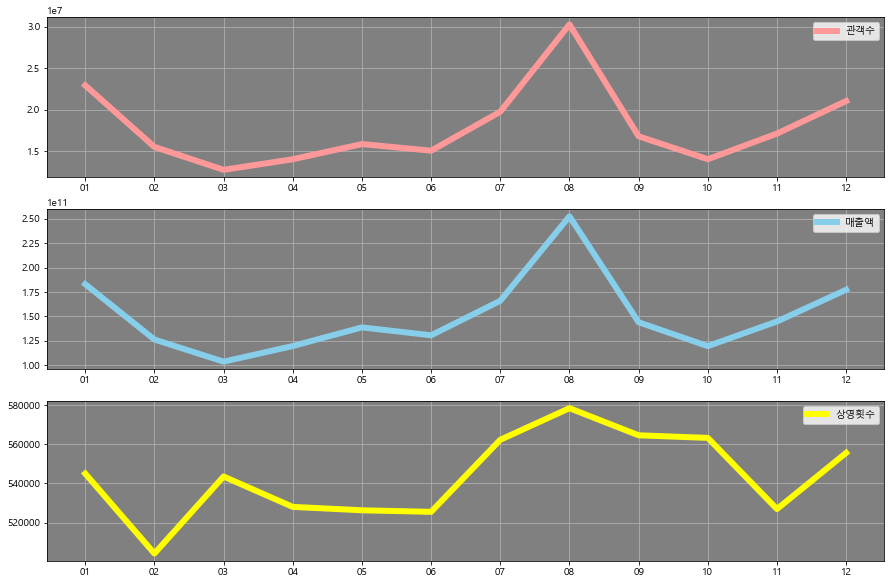

In [27]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(3,1,1)
ax.plot(month, month_au, color='#ff9999', linewidth=6, label='관객수')
ax.legend(loc='upper right')
ax.set_xticklabels(month)
ax.set_facecolor('gray')
ax.set_alpha(0.5)
plt.grid(True)

ax = fig.add_subplot(3,1,2)
ax.plot(month, month_profit, color='skyblue', linewidth=6, label='매출액')
ax.legend(loc='upper right')
ax.set_xticklabels(month)
ax.set_facecolor('gray')
ax.set_alpha(0.5)
plt.grid(True)

ax = fig.add_subplot(3,1,3)
ax.plot(month, month_scr, color='yellow', linewidth=6, label='상영횟수')
ax.legend(loc='upper right')
ax.set_xticklabels(month)
ax.set_facecolor('gray')
ax.set_alpha(0.5)

plt.grid(True)
plt.show()

#### 위의 결과로 보아 8월에 가장 많은 수익을 창출했고, 
#### 대부분이 상영횟수가 많은 달에 많은 관객을 유치했지만, 
#### 3월과 10월에는 많은 상영횟수에 비해 관객을 많이 유치하지 못했다.

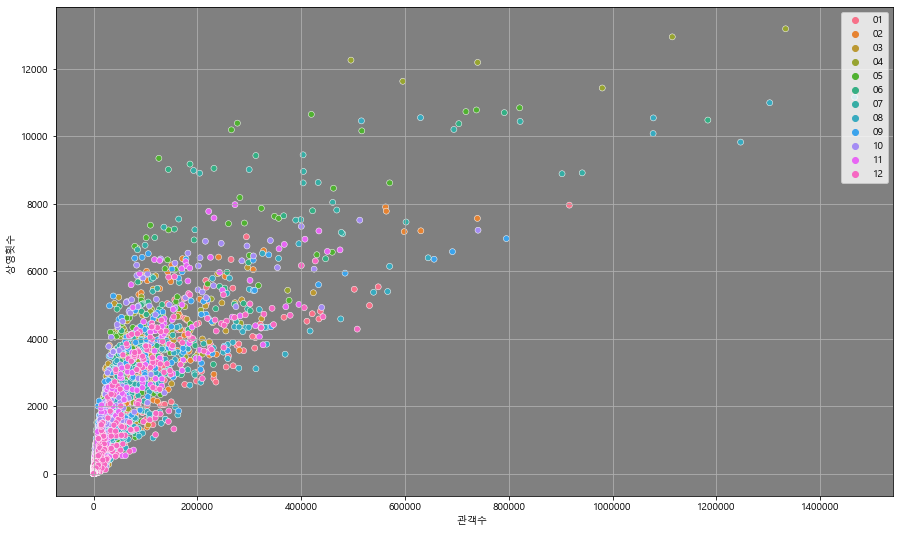

In [28]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x='관객수 ', y='상영횟수 ', hue='월', data=df)
xpoints = ypoints = ax.get_xlim()
ax.legend(loc='upper right')
ax.set_facecolor('gray')
ax.set_alpha(0.5)
plt.grid(True)
plt.show()

#### 위의 그래프가 시사하는 바는 많지 않지만 여름에 많은 관객수를 보인 영화가 많고,  
#### 상영횟수가 5000회 이상 넘어가는 순간부터 관객수가 그 전보다 완만히 증가한다는 사실을 알 수 있다.

In [29]:
def month_gen(month):
    df_sum_month = df[df['월'] == month]
    
    genre = np.array(df_sum_month['장르 '])

    genre_dic = {i:[] for i in row_set}
    genre_dic

    lines = np.array(df_sum_month)

    for row in lines:
        genre_list = str(row[-5]).split(',')
        for i in genre_list:
            genre_dic[i].append(row[2])

    genre_num = {i:0 for i in row_set}
    for i in genre_dic:
        genre_num[i] = len(genre_dic[i])
    
    mon_gen_df = pd.DataFrame(genre_num, index=[0])
    
    return mon_gen_df

In [30]:
df_list = []
for i in month:
    data = month_gen(i)
    df_list.append(data)
    
df_tt = pd.concat(df_list)
df_tt['month'] = month
df_tt = df_tt.set_index('month')
df_li = list(df_tt.sum())
df_li.sort(reverse=True)
print(df_li)
df_tt.sum()
np.array(df_li).mean()

[18956, 6202, 5437, 5179, 5118, 3889, 3789, 3280, 2411, 2215, 1808, 1548, 1465, 1426, 1103, 1047, 819, 562, 316, 307, 236]


3195.8571428571427

In [31]:
tt_col = list(df_tt.columns)
df_tt_copy = df_tt.copy()
df_tt_copy2 = df_tt.copy()
for col in tt_col:
    if df_tt[col].sum() < 5000:
        df_tt_copy.drop(col, axis=1, inplace=True)
        
df_tt_copy

,코미디,액션,멜로/로맨스,애니메이션,드라마
month,,,,,
01,342,337,512,415,1419
02,359,464,407,477,1530
03,397,529,494,417,1653
04,479,473,555,423,1725
05,475,380,494,402,1786
06,479,434,382,443,1462
07,492,593,543,351,1435
08,347,458,501,362,1316
09,414,486,578,426,1582


In [32]:
sum_mov = list(df_tt_copy2.sum(axis=1))
sum_top = list(df_tt_copy.sum(axis=1))

sub_mov = []

for i in range(len(sum_mov)):
    sub_mov.append(sum_mov[i]-sum_top[i])

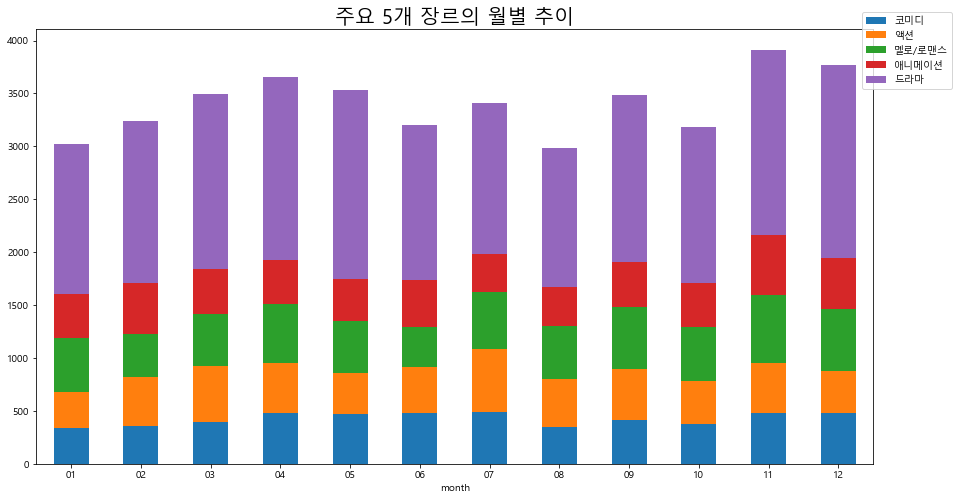

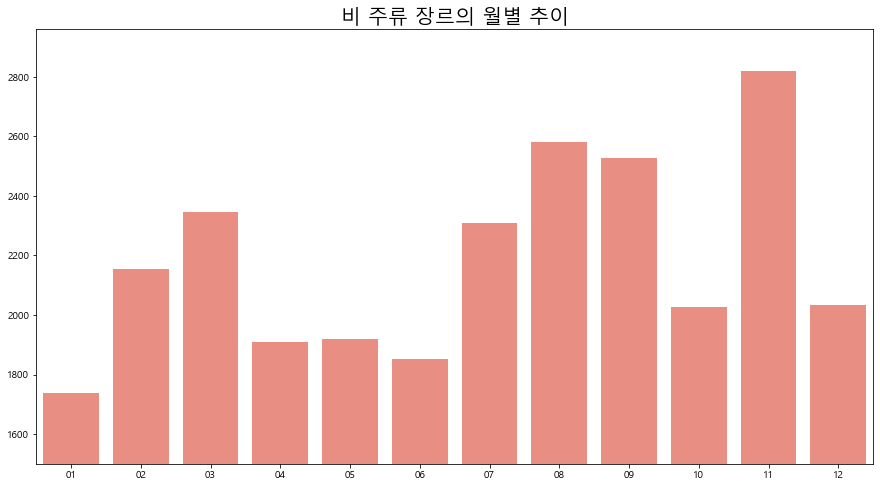

In [33]:
ax = fig.add_subplot(2,1,1)
df_tt_copy.plot.bar(stacked=True, rot=0, figsize=(15, 8))
plt.title('주요 5개 장르의 월별 추이', fontsize=20)
plt.legend(bbox_to_anchor=(1.1, 1.05))

ax = fig.add_subplot(2,1,2)
plt.figure(figsize=(15, 8))
sns.barplot(x=month, y=sub_mov, color='salmon')
plt.ylim(bottom=1500)
plt.title('비 주류 장르의 월별 추이', fontsize=20)

plt.show()

## 시청등급별 집계 시각화 

In [34]:
df['등급 '] = df['등급 '].dropna()
gen_list = np.array(df['등급 '])
rep_gen = []
for i in gen_list:
    li = str(i).split(',')
    rep_gen.append(li[0])
    
df['new등급'] = rep_gen

In [35]:
rank = np.array(df['new등급'])

fin_rank = []
for i in rank:
    if i.startswith('12') or i.startswith('미성년') or i.startswith('국민') or i.startswith('연소자'):
        fin_rank.append('12세이상관람가')
    elif i.startswith('15') or i.startswith('중학'):
        fin_rank.append('15세이상관람가')
    elif i.startswith('18') or i.startswith('고등'):
        fin_rank.append('18세이상관람가')
    elif i.startswith('미성'):
        fin_rank.append('미성년자관람불가')
        print(1)
    else:
        fin_rank.append('전체관람가')
        
df['fin_등급'] = fin_rank
df

5,index,순위,영화명,개봉일,매출액,매출액점유율,매출액증감(전일대비),매출액증감율(전일대비),누적매출액,관객수,...,제작사,배급사,등급,장르,감독,배우,new장르,월,new등급,fin_등급
0,●2018년 01월 07일(일),1,신과함께-죄와 벌,2017-12-20,4191233200,35.9,-414038062,-9.0,92571580337,502236,...,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",판타지,01,12세이상관람가,12세이상관람가
1,●2018년 01월 07일(일),2,1987,2017-12-27,3539227900,30.3,-132997398,-3.6,32847722932,421153,...,(주)우정필름,씨제이이앤엠(주),15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,윤재국,지웅배,정재윤,이가...",드라마,01,15세이상관람가,15세이상관람가
2,●2018년 01월 07일(일),3,쥬만지: 새로운 세계,2018-01-03,2144205100,18.4,-127156870,-5.6,7342405650,255402,...,NaN,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,12세이상관람가,"액션,어드벤처",제이크 캐스단,"드웨인 존슨,잭 블랙,케빈 하트,카렌 길런,매디슨 아이스먼",액션,01,12세이상관람가,12세이상관람가
3,●2018년 01월 07일(일),4,페르디난드,2018-01-03,758165400,6.5,-6955400,-0.9,2625604300,98378,...,NaN,이십세기폭스코리아(주),전체관람가,"애니메이션,어드벤처,코미디",카를로스 살다나,"존 시나,케이트 맥키넌,데이비드 테넌트,바비 카나베일,미구엘 앙겔 실베스트르,지나 ...",애니메이션,01,전체관람가,전체관람가
4,●2018년 01월 07일(일),5,강철비,2017-12-14,359118000,3.1,-51566600,-12.6,34705414466,43259,...,"(주)와이웍스엔터테인먼트,(주)모팩",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,드라마",양우석,"정우성,곽도원,김갑수,김의성,이경영,조우진,정원중,김명곤,박은혜,김지호,안미나,원진...",액션,01,15세이상관람가,15세이상관람가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40288,●2018년 12월 24일(월),101,열녀문,NaN,2000,0.0,2000,100.0,8936000,1,...,신필름,NaN,청소년관람불가,사극,신상옥,"신영균,최은희",사극,12,청소년관람불가,전체관람가
40289,●2018년 12월 24일(월),101,뷰티풀 데이즈,2018-11-21,7000,0.0,-30000,-81.1,54437050,1,...,(주)페퍼민트앤컴퍼니,"(주)콘텐츠판다,(주)스마일이엔티",12세이상관람가,드라마,윤재호,"이나영,장동윤,오광록,서현우,고영상,김아라,김현주,이강우,이기훈,이정은,전성모,정준...",드라마,12,12세이상관람가,12세이상관람가
40290,●2018년 12월 24일(월),101,위시업,2018-12-13,2000,0.0,2000,100.0,14598550,1,...,NaN,(주)영화사 그램,15세이상관람가,"뮤지컬,코미디,멜로/로맨스",스콧 스피어,"로스 린치,올리비아 홀트",뮤지컬,12,15세이상관람가,15세이상관람가
40291,●2018년 12월 24일(월),101,리스펙트,2018-11-28,6000,0.0,0,0.0,18968250,1,...,라이브(주),커넥트픽쳐스(주),15세이상관람가,다큐멘터리,심재희,"더 콰이엇,도끼,딥플로우,MC 메타,빈지노,산이,스윙스,제리케이,제이제이케이,타이거...",다큐멘터리,12,15세이상관람가,15세이상관람가


In [36]:
au = pd.DataFrame(df.groupby('fin_등급')['관객수 '].sum())
au.reset_index(inplace=True)
au

,fin_등급,관객수
0,12세이상관람가,116442731
1,15세이상관람가,68960526
2,18세이상관람가,54995
3,전체관람가,30015353


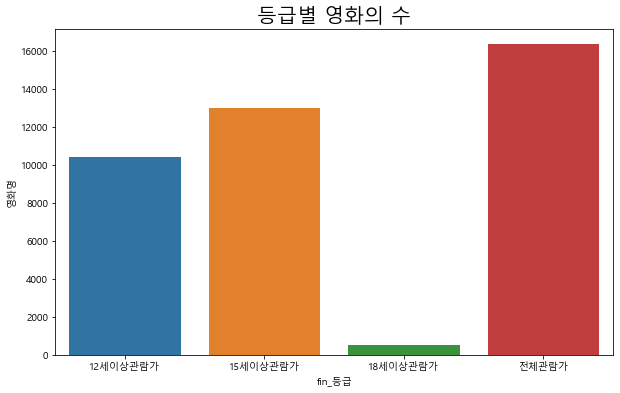

In [37]:
freq = pd.DataFrame(df.groupby('fin_등급')['영화명'].count())
freq.reset_index(inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(
    data= freq,
    x= "fin_등급",
    y= "영화명"
)
plt.title('등급별 영화의 수', fontsize=20)
plt.show()

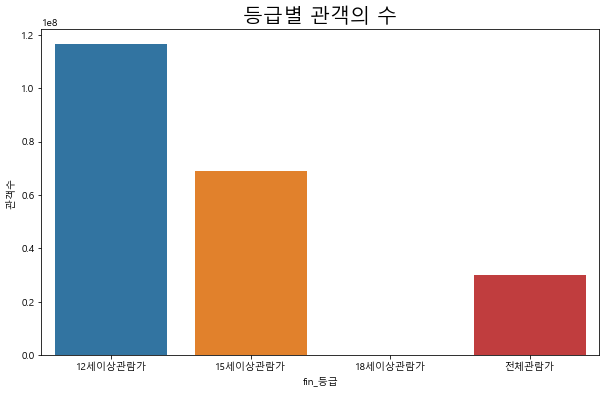

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(
    data= au,
    x= "fin_등급",
    y= "관객수 "
)
plt.title('등급별 관객의 수', fontsize=20)
plt.show()